In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout

In [3]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2023-07-30 18:32:27--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2023-07-30 18:32:27--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc554e7f1a0dc71669a8c72a058b.dl.dropboxusercontent.com/cd/0/inline/CA0jd2H68b2Mp_tKSf2NggLdMkF2rT51qWxu33rS8UIV8HNIgHpJ89V-CcQOKDcDM3A6LkYkd_YnXA39z9zJDyj8XtfSGfUhj3__OcUCs4RYpRxVhxHzSfohszkaGeyHFI4/file# [following]
--2023-07-30 18:32:28--  https://uc554e7f1a0dc71669a8c72a058b.dl.dropboxusercontent.com/cd/0/inline/CA0jd2H68b2Mp_tKSf2NggLdMkF2rT51q

In [4]:
!unzip '/content/state-farm-distracted-driver-detection.zip'

Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [5]:
!unzip '/content/imgs.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

In [6]:
len(os.listdir('test'))

79726

In [7]:
print(len(os.listdir('/content/train/c0')))
print(len(os.listdir('/content/train/c1')))
print(len(os.listdir('/content/train/c2')))
print(len(os.listdir('/content/train/c3')))
print(len(os.listdir('/content/train/c4')))
print(len(os.listdir('/content/train/c5')))
print(len(os.listdir('/content/train/c6')))
print(len(os.listdir('/content/train/c7')))
print(len(os.listdir('/content/train/c8')))
print(len(os.listdir('/content/train/c9')))

2489
2267
2317
2346
2326
2312
2325
2002
1911
2129


In [8]:
model=Sequential()
model.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation="relu"))

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
#Test directory
%mkdir Test

In [13]:
#moving the test images to Test directory
!mv /content/test/  /content/Test

In [14]:
train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training'
        )

validation_generator = train_datagen.flow_from_directory(
        '/content/train',
         target_size=(64, 64),
         batch_size=32,
        class_mode='categorical',
         subset='validation'
        )


test_generator = test_datagen.flow_from_directory(
    '/content/Test',
        target_size=(64, 64),
        batch_size=2,
        shuffle=False,
        class_mode='categorical'

)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.
Found 79726 images belonging to 1 classes.


In [15]:
type(test_generator)

keras.preprocessing.image.DirectoryIterator

In [16]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [18]:
model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/10
560/560 [==============================] - 78s 140ms/step - loss: 3.6014 - accuracy: 0.1657 - val_loss: 3.4997 - val_accuracy: 0.2272
Epoch 2/10
560/560 [==============================] - 70s 126ms/step - loss: 3.5891 - accuracy: 0.1622 - val_loss: 3.6225 - val_accuracy: 0.1237
Epoch 3/10
560/560 [==============================] - 71s 127ms/step - loss: 3.5929 - accuracy: 0.1615 - val_loss: 3.6492 - val_accuracy: 0.1038
Epoch 4/10
560/560 [==============================] - 77s 137ms/step - loss: 3.6188 - accuracy: 0.1491 - val_loss: 3.5433 - val_accuracy: 0.2078
Epoch 5/10
560/560 [==============================] - 78s 140ms/step - loss: 3.5796 - accuracy: 0.1726 - val_loss: 3.5939 - val_accuracy: 0.1958
Epoch 6/10
560/560 [==============================] - 70s 125ms/step - loss: 3.6259 - accuracy: 0.1477 - val_loss: 3.5710 - val_accuracy: 0.2248
Epoch 7/10
560/560 [==============================] - 79s 140ms/step - loss: 3.5149 - accuracy: 0.2053 - val_loss: 3.5043 - val_ac

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [20]:
mod = Sequential()
mod.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(64,64,3)))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.3))
mod.add(Conv2D(128,kernel_size=(5,5),activation='relu',padding='same'))
mod.add(BatchNormalization())
mod.add(MaxPooling2D(pool_size=(2,2),padding='same'))
mod.add(Dropout(0.5))
mod.add(Flatten())
mod.add(Dense(units = 512,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.5))
mod.add(Dense(units = 128,activation='relu'))
mod.add(Dropout(0.25))
mod.add(Dense(10,activation='softmax'))

In [21]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
VALIDATION_STEPS=validation_generator.n//train_generator.batch_size

In [23]:
model2=mod.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=VALIDATION_STEPS)

Epoch 1/5
560/560 [==============================] - 77s 130ms/step - loss: 1.9830 - accuracy: 0.3286 - val_loss: 1.7984 - val_accuracy: 0.3469
Epoch 2/5
560/560 [==============================] - 72s 129ms/step - loss: 1.1854 - accuracy: 0.5729 - val_loss: 1.0915 - val_accuracy: 0.6333
Epoch 3/5
560/560 [==============================] - 79s 141ms/step - loss: 0.8578 - accuracy: 0.7020 - val_loss: 0.4185 - val_accuracy: 0.8627
Epoch 4/5
560/560 [==============================] - 73s 130ms/step - loss: 0.6621 - accuracy: 0.7766 - val_loss: 0.3349 - val_accuracy: 0.8908
Epoch 5/5
560/560 [==============================] - 78s 140ms/step - loss: 0.5421 - accuracy: 0.8168 - val_loss: 0.4493 - val_accuracy: 0.8547


In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

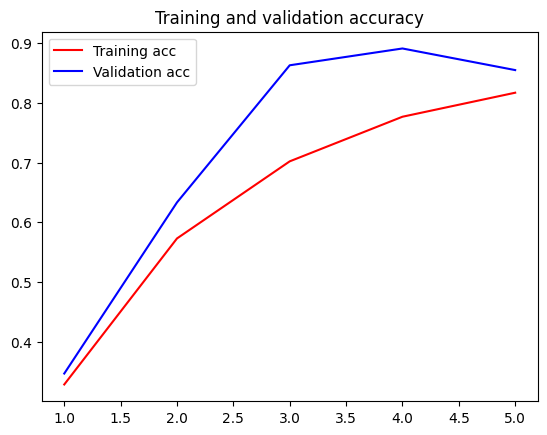

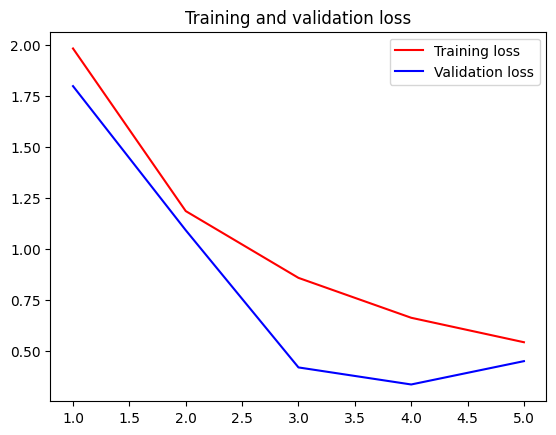

In [25]:
acc = model2.history['accuracy']
val_acc = model2.history['val_accuracy']
loss = model2.history['loss']
val_loss = model2.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
#plotting train and validation losses
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=mod.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

39863/39863 [==============================] - 241s 6ms/step


In [27]:
pred

array([[8.0664540e-05, 1.9540476e-08, 4.5393081e-06, ..., 1.8055080e-05,
        5.1884702e-04, 2.4590496e-04],
       [9.2844903e-06, 2.8831623e-08, 6.7830422e-07, ..., 1.5398506e-03,
        1.9586360e-04, 6.1928725e-04],
       [6.1394465e-01, 6.4688586e-03, 3.1919426e-06, ..., 3.6787489e-04,
        1.4776506e-02, 3.5155368e-01],
       ...,
       [5.5095158e-03, 2.9962945e-05, 9.5115993e-03, ..., 7.3847518e-04,
        5.3969789e-01, 4.0605646e-02],
       [1.3354667e-06, 2.6551265e-07, 1.7997591e-01, ..., 1.2110298e-04,
        9.9952668e-02, 1.0924972e-05],
       [4.2042111e-06, 2.0893701e-07, 1.1411452e-06, ..., 9.7816246e-07,
        5.1626773e-03, 3.3011414e-02]], dtype=float32)

In [28]:
len(pred)

79726

In [29]:
labels_test_predictions = pd.DataFrame(pred)
labels_test_predictions

,0,1,2,3,4,5,6,7,8,9
0,0.000081,1.954048e-08,4.539308e-06,1.370790e-06,3.896384e-05,0.999089,0.000003,1.805508e-05,0.000519,0.000246
1,0.000009,2.883162e-08,6.783042e-07,4.423466e-06,2.754232e-05,0.997600,0.000003,1.539851e-03,0.000196,0.000619
2,0.613945,6.468859e-03,3.191943e-06,3.367206e-04,1.238284e-02,0.000055,0.000110,3.678749e-04,0.014777,0.351554
3,0.156382,9.004176e-04,7.708855e-03,1.408302e-04,9.324569e-02,0.003145,0.026002,9.321059e-03,0.424787,0.278367
4,0.008509,2.762608e-08,1.819662e-06,6.123436e-02,8.678007e-01,0.017464,0.000021,4.096722e-05,0.042720,0.002209
...,...,...,...,...,...,...,...,...,...,...
79721,0.000554,9.822580e-01,5.535789e-03,2.594132e-06,8.749606e-05,0.000372,0.000691,4.071866e-04,0.004014,0.006079
79722,0.194915,2.334169e-01,1.668219e-02,2.565259e-02,2.450322e-03,0.000113,0.014680,6.061985e-04,0.039820,0.471664
79723,0.005510,2.996294e-05,9.511599e-03,1.913889e-04,2.958386e-01,0.000075,0.107802,7.384752e-04,0.539698,0.040606
79724,0.000001,2.655127e-07,1.799759e-01,1.621046e-09,1.016947e-05,0.000002,0.719926,1.211030e-04,0.099953,0.000011


In [30]:
labels_test_predictions.to_csv('Distracted_Driver_MultiAction_Classification.csv',index=False)

In [31]:
from google.colab import files
files.download("Distracted_Driver_MultiAction_Classification.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>